<a href="https://colab.research.google.com/github/ewapajak/ML/blob/main/homework1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data
--------------------

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$


#Loading our dataset

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv"
df = pd.read_csv(url)

print("Column Names:")
print(df.columns)

print("\nData: ")
print(df)

print("\nFirst 5 Rows:")
print(df.head())

print("\nClass count: ")
print(df['class'].value_counts())


Column Names:
Index(['x', 'y', 'z', 'class'], dtype='object')

Data: 
            x         y          z  class
0    0.647689 -0.138264   3.512299      0
1   -0.234137 -0.234153  10.769447      0
2   -0.469474  0.767435  11.166721      0
3   -0.465730 -0.463418   3.836479      0
4   -1.724918 -1.913280   1.710932      0
..        ...       ...        ...    ...
295  4.640708  0.583928  13.058193      2
296  5.820482  1.108704   4.176560      2
297  6.169296  1.066675   3.586969      2
298  4.832882  0.648710   9.773340      2
299  4.183064  1.206509   1.037422      2

[300 rows x 4 columns]

First 5 Rows:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0

Class count: 
class
0    100
1    100
2    100
Name: count, dtype: int64


#Visualizing our dataset:

### **3D plot:**

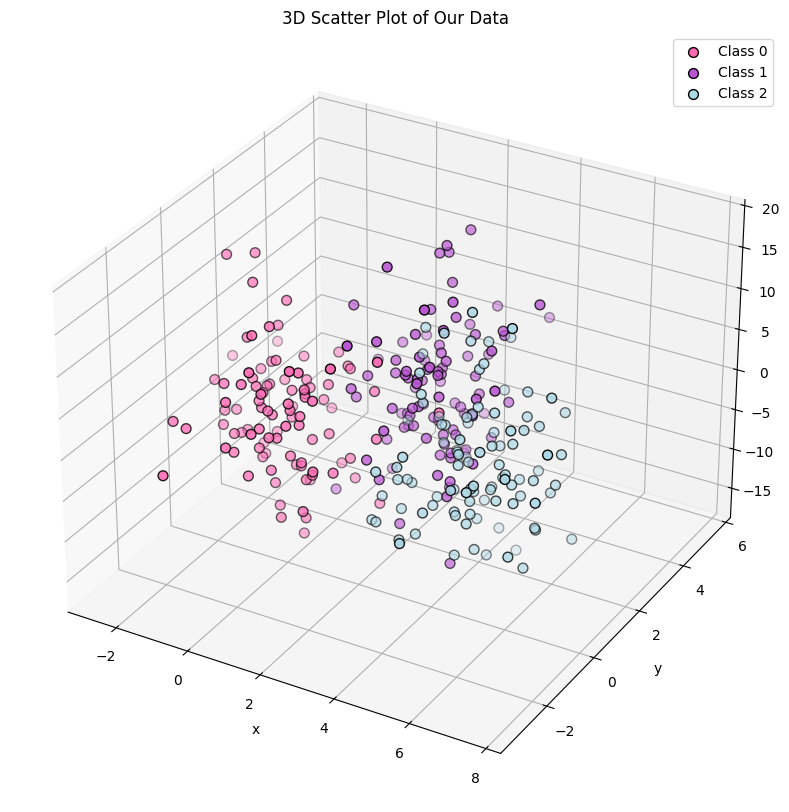

In [10]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors ={"0" : "hotpink", "1" : "mediumorchid", "2" : "lightblue"}

for cluster in df['class'].unique():
    cluster_data = df[df['class'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], cluster_data['z'], color=colors[str(cluster)], label=f'Class {cluster}', s = 50, edgecolors= 'k')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("x")
ax.set_title("3D Scatter Plot of Our Data")
ax.legend()
plt.show()


### **2D plots:**

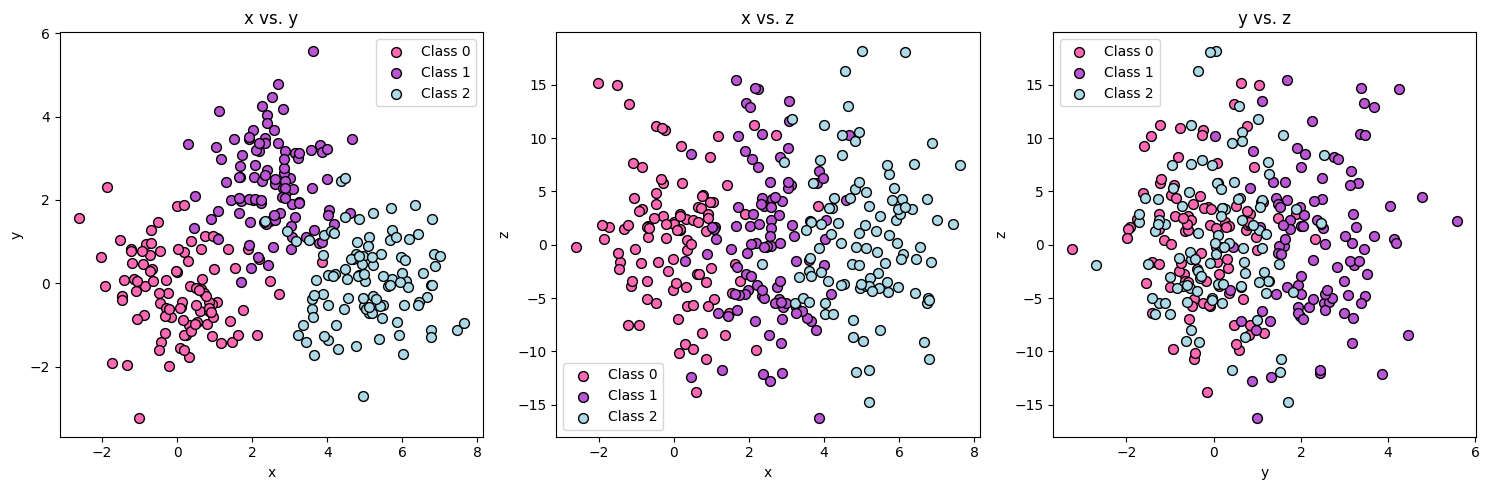

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

pairs = [('x', 'y'), ('x', 'z'), ('y', 'z')]

for i, (x_ax, y_ax) in enumerate(pairs):
  for cluster in df['class'].unique():
    cluster_data = df[df['class'] == cluster]
    axes[i].scatter(cluster_data[x_ax], cluster_data[y_ax], color=colors[str(cluster)], label=f'Class {cluster}', s = 50, edgecolors= 'k')

  axes[i].set_xlabel(x_ax)
  axes[i].set_ylabel(y_ax)
  axes[i].set_title(f'{x_ax} vs. {y_ax}')
  axes[i].legend()


plt.tight_layout()
plt.show()



#Principal Component Analysis

The principal components: 
[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]

X projected onto V (first 7 rows): 
[[-1.12582206  0.05986874]
 [-1.89368654  0.95808305]
 [-1.61886158  1.39907438]
 [-1.61654666 -0.01318696]
 [-2.41865284 -0.83294294]
 [-1.08642643 -1.23111585]
 [-0.72091981 -1.70971126]]

Explained variance ratio:
[0.34722276 0.33441835]

Cumulative explained variance ratio:
[0.34722276 0.68164111]


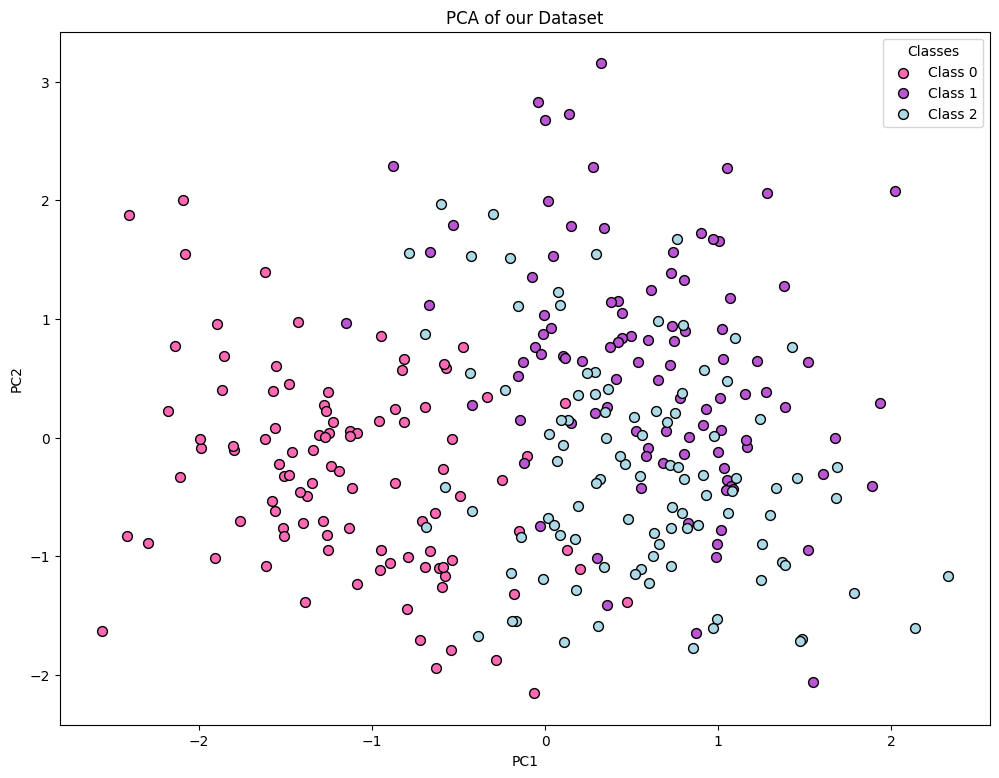

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X= df[['x', 'y', 'z']].values
y = df['class'].values

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components = 2)
XV = pca.fit_transform(X_standardized)

print("The principal components: ")
print(pca.components_)

print("\nX projected onto V (first 7 rows): ")
print(XV[:7])

print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)


print("\nCumulative explained variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize = (12,9))
for cluster in np.unique(y):
    plt.scatter(XV[y == cluster, 0], XV[y == cluster, 1],
                color=colors[str(cluster)], label=f'Class {cluster}', s = 50, edgecolors= 'k')



plt.title("PCA of our Dataset")
plt.legend(title = 'Classes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#**First Question**
**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**


The x vs z and x vs y plots show some level of separation for the classes, whearas the y vs z plot exhibits the least separation, with all the classes overlapping heavily.

PCA projected our 3D data onto a 2D space that captures the most variance. It seems to improve the separation compared to the y vs z feature space. We can still observe the data overlapping quite heavily, yet the clusters are more spread out.

PCA improved the separation of clusters compared to the worst feature space. However, since PCA only captures the linear combination of features that maximizes variance, it does not guarantee perfect class separation. Because the y vs z plot showed little separation to begin with, PCA could not fully decluster the data but still provided a better visualization than the y vs z feature space.


#**Second Question**
**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

The goal of PCA is to find a direction (a linear combination of features) that captures the maximum variance in the data. However the results can be influenced by the units in which variables are measured. If the features are differently scaled, then PCA will give more importance (bigger weights in the linear combination) to the ones with larger variances, potentially distorting the analysis.


###**EXAMPLE:**
Let's assume we have two features:


*   Height - measured in meters (1.8m, 1.7m, 1.75m)
*   Weight - measured in grams (80000g, 68000g, 75000g)



Even though the differences in weights are relatively small, they have much larger variance than the height variables. Since PCA looks for directions that maximize the variance, it will prioritize the weight variable simply because the variance is significantly larger. The first principal component would end up being almost entirely determined by weight.

Standardizing the data before applying PCA ensures a more balanced and meaningful analysis by preventing features with larger variances from dominating the results.







### **Our results:**
Explained variance ratio:
[0.34722276 0.33441835]

Cumulative explained variance ratio:
[0.34722276 0.68164111]

Standardizing our data before applying PCA resulted in the two principal components contributing almost equally to the variance.


